# Graphs depicting the blacklisting frequency of multiple liars infiltrating multiple clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#configs
distance = 100000
nbClusters = 2
nbLiars = 2
nbNodesRange = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
withSuspects = True


filename = "cluster_infiltration_N_" + str(nbNodesRange[0]) + "_to_" + \
    str(nbNodesRange[len(nbNodesRange)-1]) + "_with_" + str(nbClusters) +\
    "_clusters_" + str(nbLiars) + "_liars"

if withSuspects:
    filename += "_with_suspects"


In [3]:
data= pd.read_csv("data/" + filename + ".csv").drop_duplicates()

In [4]:
data[data["liar_caught"] == False][data["N"] == 12]

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,N,c1,c2,liar_caught


In [5]:
data[["N", "liar_caught"]].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()

liar_caught,N,False,True
0,13,8,4
1,14,8,5
2,15,11,3
3,16,11,4
4,17,11,6
5,18,12,5
6,19,12,6
7,20,12,7
8,21,13,7
9,22,15,8


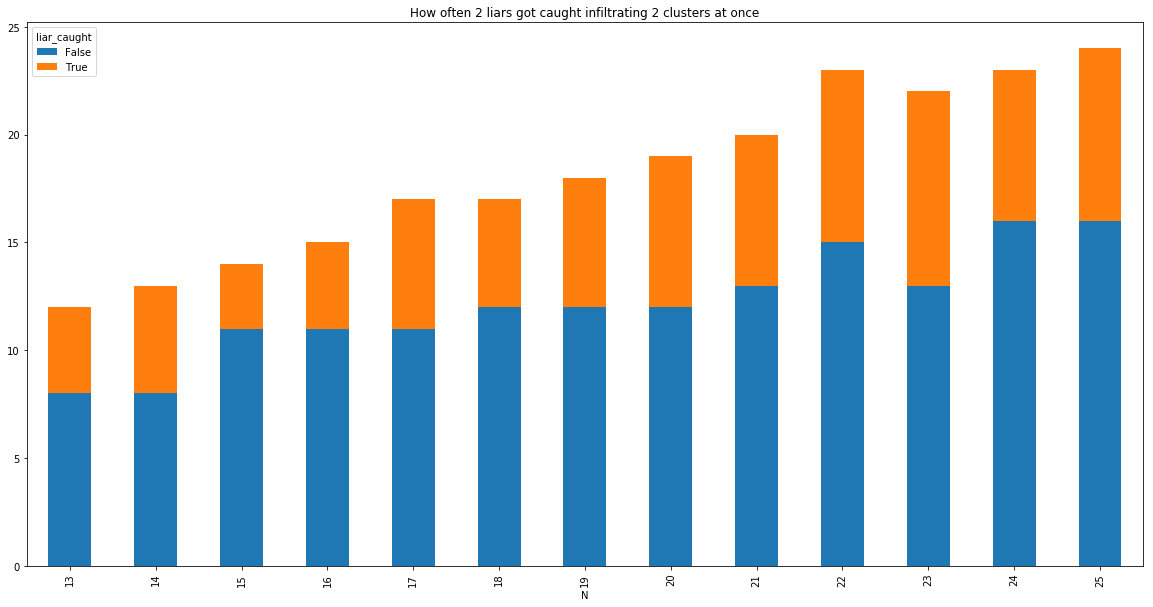

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
data[["N", "liar_caught"]].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
    .plot.bar(stacked=True, ax=ax, x="N", 
              title="How often "+str(nbLiars)+" liars got caught infiltrating "+str(nbClusters)+" clusters at once")

In [7]:
fig.savefig('graphs/blacklisting_percentages/'+filename+'.png')

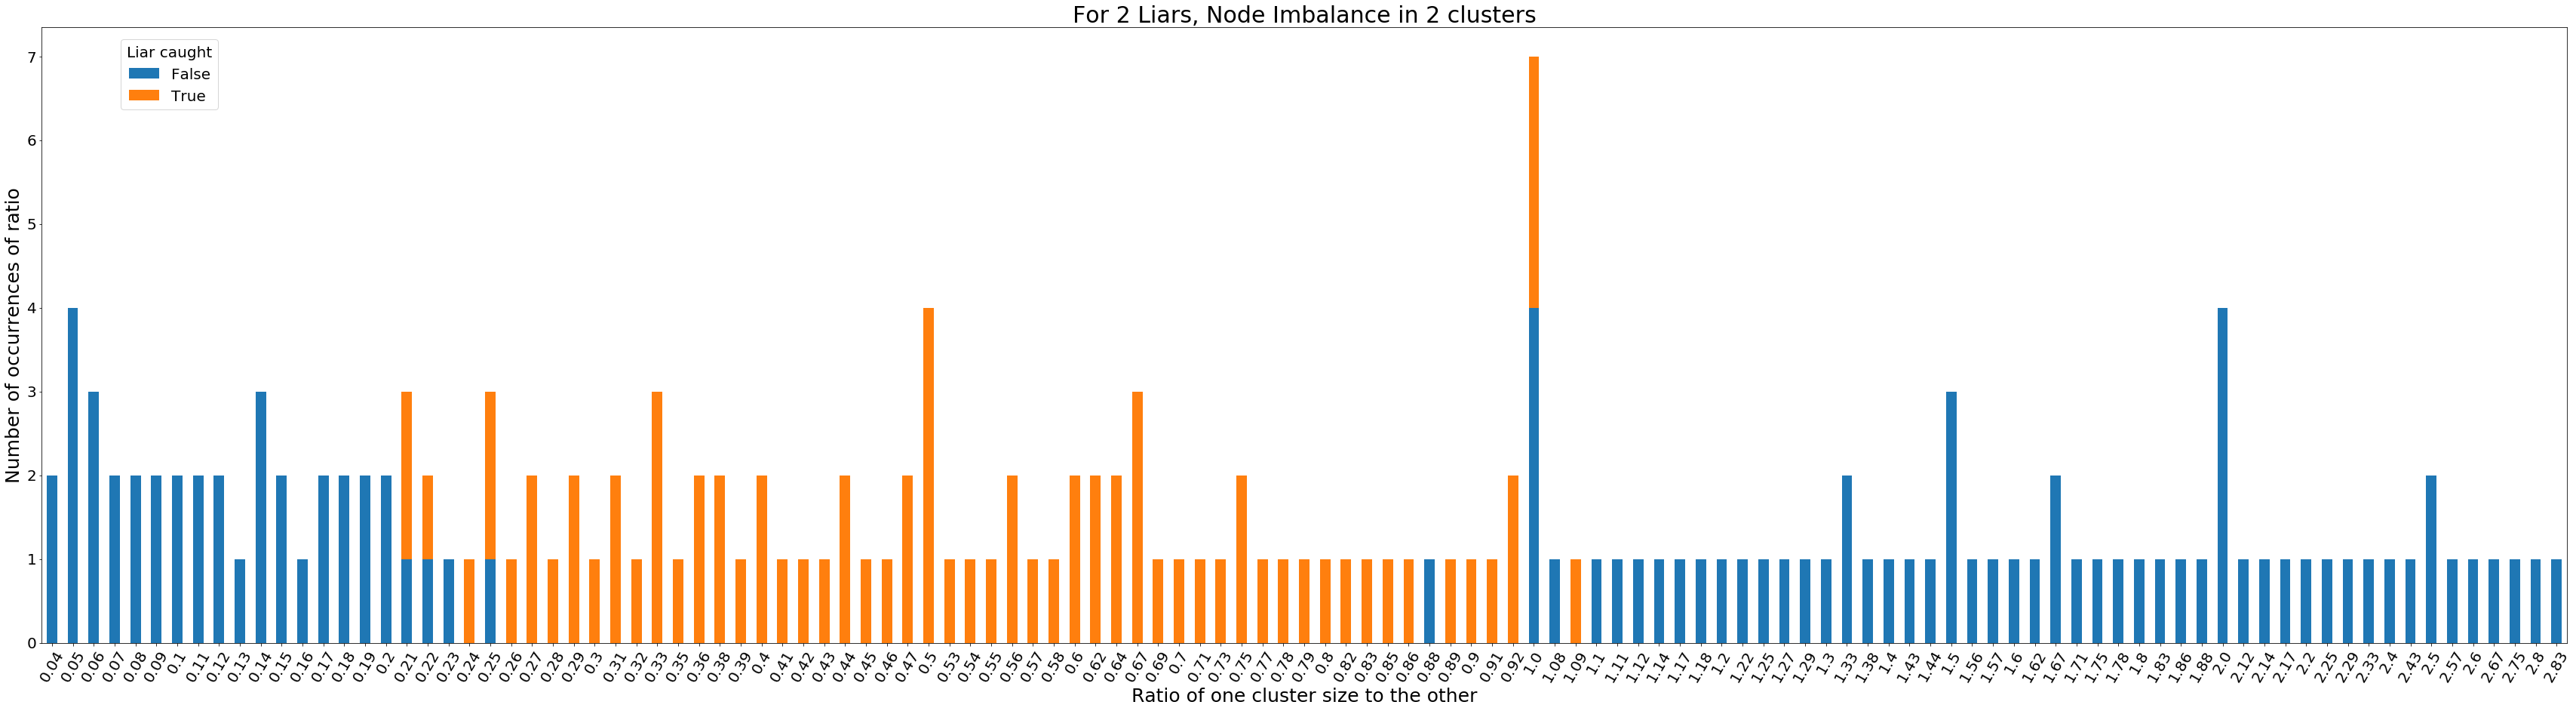

In [8]:
if nbClusters == 2:
    data["imbalance"] = (data["c1"]/data["c2"]).round(2)
    fig1, ax1 = plt.subplots(figsize=(60, 15))
    data[["imbalance", "liar_caught"]][data["imbalance"] < 3]\
        .groupby(["imbalance", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
        .plot.bar(stacked=True, ax=ax1, x="imbalance", fontsize=20)
    
    plt.title("For "+str(nbLiars)+" Liars, Node Imbalance in "+str(nbClusters)+" clusters", fontsize=30)
    plt.legend(bbox_to_anchor=(0.07, 0.98), loc=1, borderaxespad=0., fontsize=20, title="Liar caught", 
           title_fontsize="20")
    plt.xticks(rotation=60)
    ax1.set_ylabel("Number of occurrences of ratio", fontsize=25)
    ax1.set_xlabel("Ratio of one cluster size to the other", fontsize=25)
    fig1.savefig('graphs/cluster_ratios/'+filename+'_cluster_ratio.png')

In [9]:
data

,N,c1,c2,liar_caught,imbalance
0,13,6,7,True,0.86
1,13,7,6,False,1.17
12,13,5,8,True,0.62
13,13,8,5,False,1.60
24,13,4,9,True,0.44
25,13,9,4,False,2.25
36,13,3,10,True,0.30
37,13,10,3,False,3.33
48,13,2,11,False,0.18
49,13,11,2,False,5.50
